In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# **Matplotlib**
## **Line Chart**

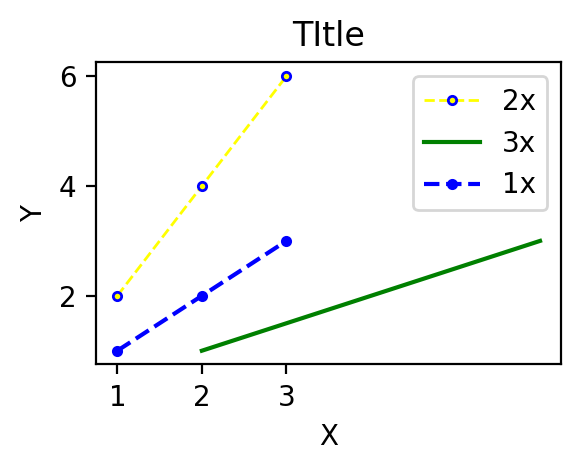

In [2]:
x=[1, 2, 3]
y=[2, 4, 6]
plt.figure(figsize=(3, 2), dpi=200)
plt.plot(x, y, label="2x", color="yellow", linewidth=1, marker='.', markeredgecolor="blue", linestyle="--")
plt.plot(y, x, label="3x", color="green")
plt.plot(x, x, 'b.--', label="1x")
plt.title("TItle")
plt.xlabel("X")
plt.ylabel("Y")
plt.xticks([1,2,3])
plt.yticks([2, 4, 6])

plt.legend()
plt.show()

## **Bar Chart**

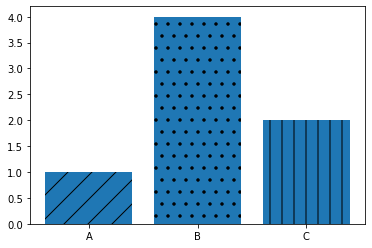

In [3]:
labels = ["A", "B", "C"]
values = [1, 4, 2]

bar = plt.bar(labels, values)
bar[0].set_hatch("/")
bar[1].set_hatch(".")
bar[2].set_hatch("|")
                 
plt.show()

# **Seaborn**

In [37]:
tips_df = pd.read_csv("../input/seaborn/tips.csv")
# tips_df
crash_df = pd.read_csv("../input/seaborn/car_crashes.csv")
# crash_df.head()
flights = pd.read_csv("../input/seaborn/flights.csv")
iris_df = pd.read_csv("../input/seaborn/iris.csv")
# iris_df
atten = pd.read_csv("../input/seaborn/attention.csv")

## Distribution Plots

### Distribution Plot

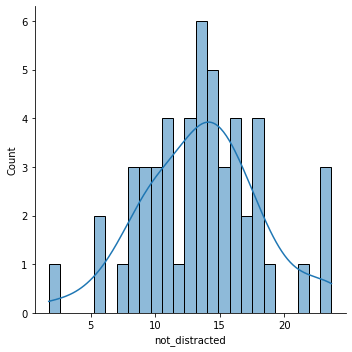

In [5]:
sns.displot(crash_df["not_distracted"], kde=True, bins=25)

### Joint Plot

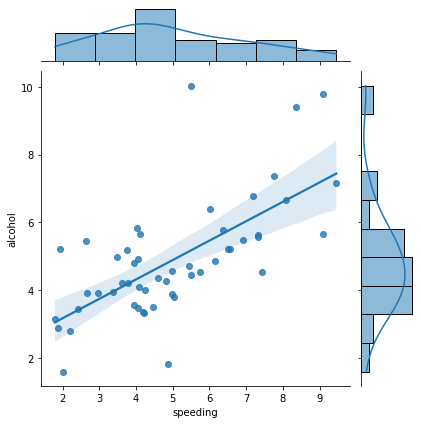

In [6]:
sns.jointplot(x="speeding", y="alcohol", data=crash_df, kind='reg')

### KDE Plot

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

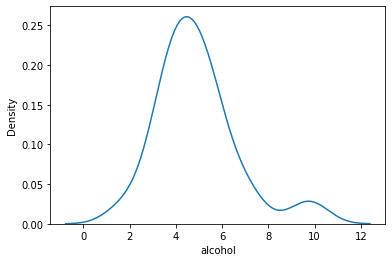

In [7]:
sns.kdeplot(crash_df["alcohol"])

### Pair Plots

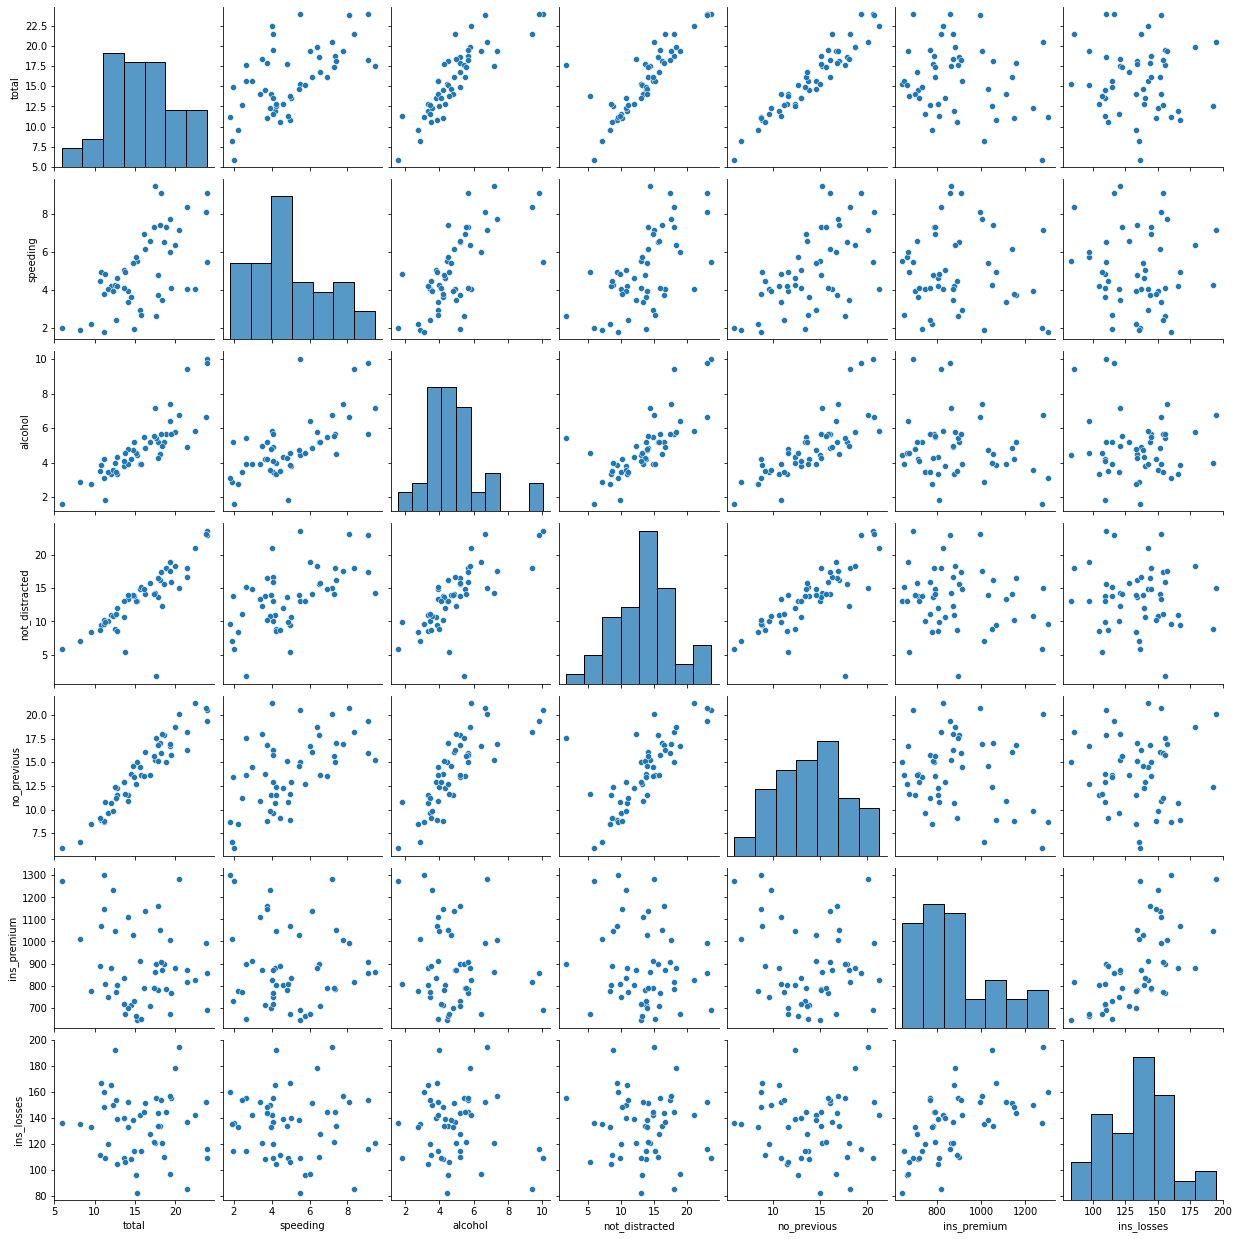

In [8]:
sns.pairplot(crash_df)

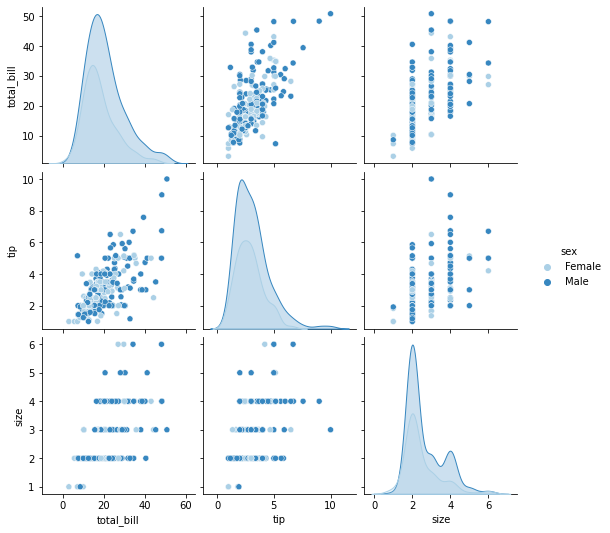

In [9]:
sns.pairplot(tips_df, hue="sex", palette="Blues")

### Rug Plot

<AxesSubplot:xlabel='tip'>

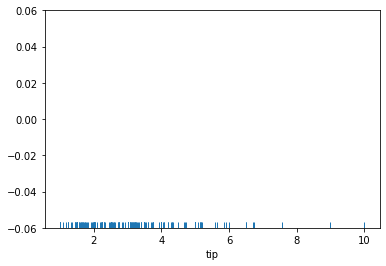

In [10]:
sns.rugplot(tips_df['tip'])

## Styling

<Figure size 216x144 with 0 Axes>

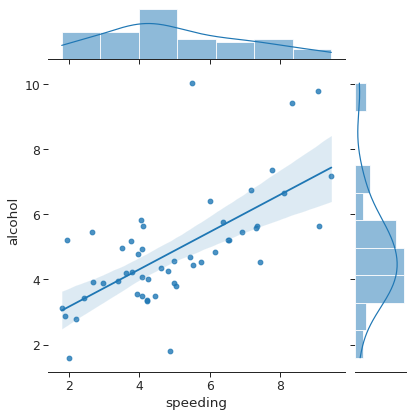

In [11]:
sns.set_style('ticks')
plt.figure(figsize=(3, 2))

sns.set_context('paper', font_scale=1.4)

sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

sns.despine(left=True, bottom=False)

## Categorical Plots

### Bar Plots

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

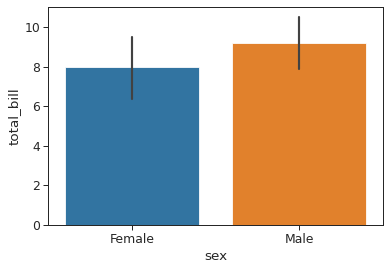

In [12]:
sns.barplot(x='sex', y='total_bill', data=tips_df, estimator=np.std)

### Count Plot

<AxesSubplot:xlabel='sex', ylabel='count'>

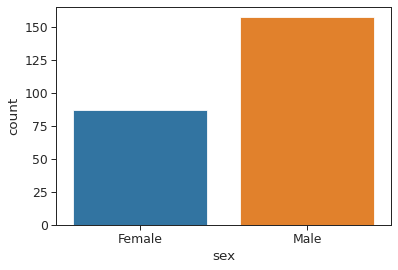

In [13]:
sns.countplot(x='sex', data=tips_df)

### Box Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

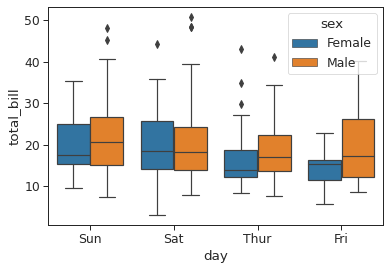

In [14]:
sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex')

### Violin Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

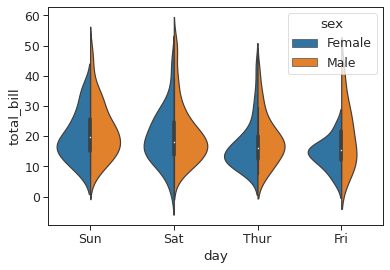

In [15]:
sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex', split=True)

### Strip Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

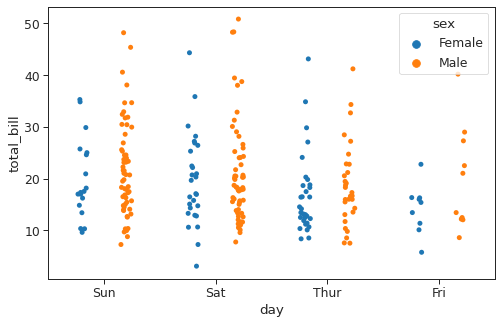

In [16]:
plt.figure(figsize=(8, 5))

sns.stripplot(x='day', y='total_bill', data=tips_df, jitter=True, hue='sex', dodge=True)

### Swarm Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

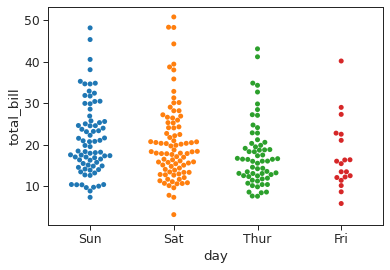

In [17]:
# sns.violinplot(x='day', y='total_bill', data=tips_df)
sns.swarmplot(x='day', y='total_bill', data=tips_df)

### Palettes

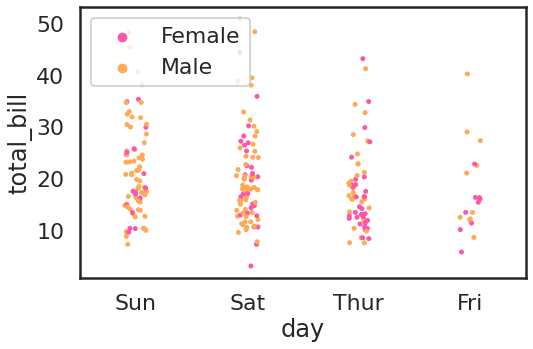

In [18]:
plt.figure(figsize=(8, 5))
sns.set_style('white')
sns.set_context('poster')
sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex', palette='spring')

# legend loc: 
# upper right = 1,  upper left = 2,  lower left = 3,  lower right = 4
plt.legend(loc=2)

## Matrix Plots

### Heatmaps

<AxesSubplot:>

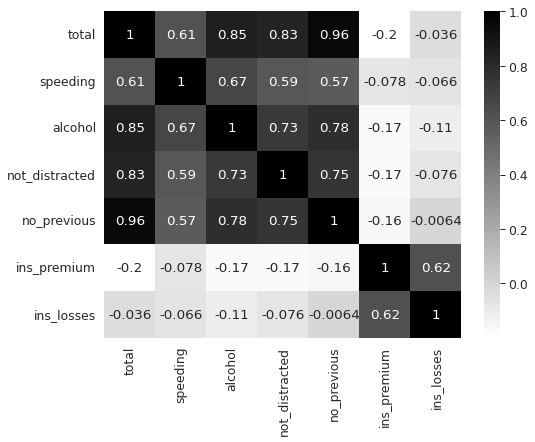

In [19]:
plt.figure(figsize=(8, 6))
sns.set_context('paper', font_scale=1.4)

crash_mx = crash_df.corr()

sns.heatmap(crash_mx, annot=True, cmap='binary')

In [20]:

flights = flights.pivot_table(index='month', columns='year', values='passengers')

<AxesSubplot:xlabel='year', ylabel='month'>

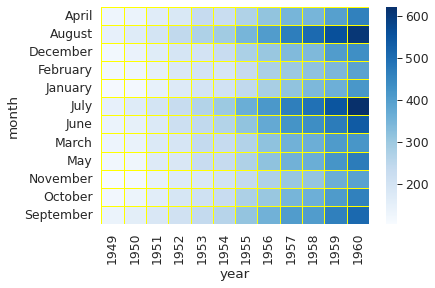

In [21]:
sns.heatmap(flights, cmap='Blues', linecolor='yellow', linewidth=1)

### Cluster Map

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

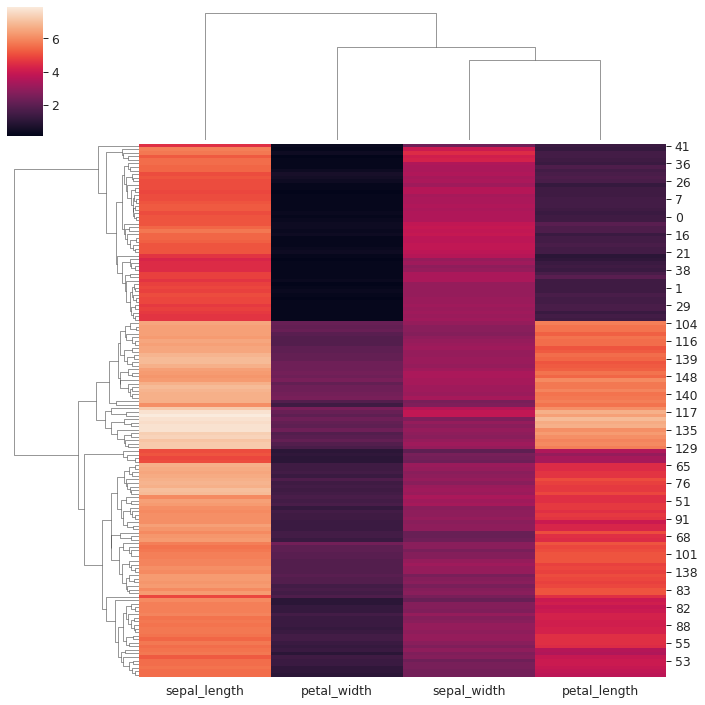

In [38]:
duplicate_iris_df = iris_df.copy()
species = duplicate_iris_df.pop('species')
sns.clustermap(duplicate_iris_df)

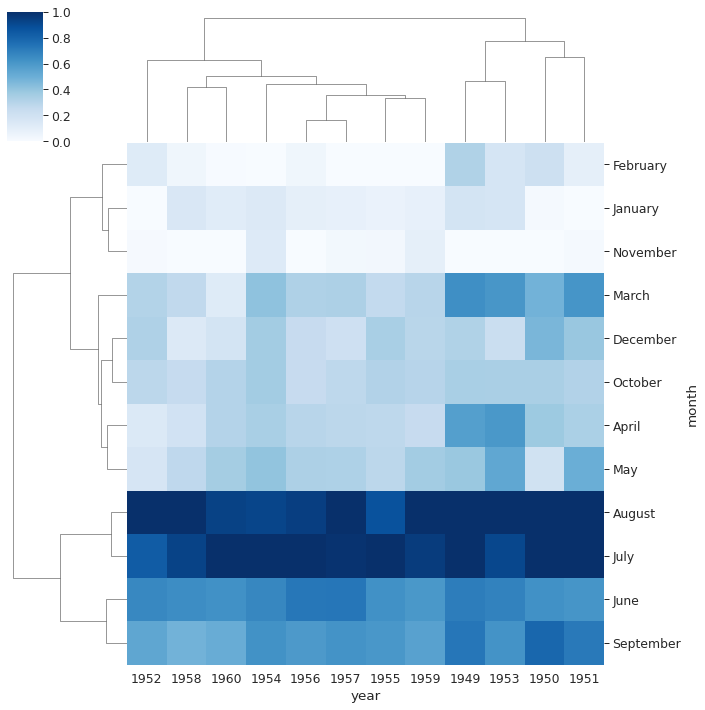

In [23]:
sns.clustermap(flights, cmap="Blues", standard_scale=1)

### PairGrid

In [29]:
# iris_g = sns.PairGrid(iris_df, hue="species")
# iris_g.map(plt.scatter)
# iris_g.map_diag(plt.hist)
# # iris_g.map_offdiag(plt.scatter)
# iris_g.map_upper(plt.scatter)
# iris_g.map_lower(sns.kdeplot)
iris_g = sns.PairGrid(iris_df, hue="species", x_vars=['sepal_length', "sepal_width"], y_vars=['petal_length', "petal_width"])
iris_g.map(plt.scatter)
iris_g.add_legend()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

### Facet Grid

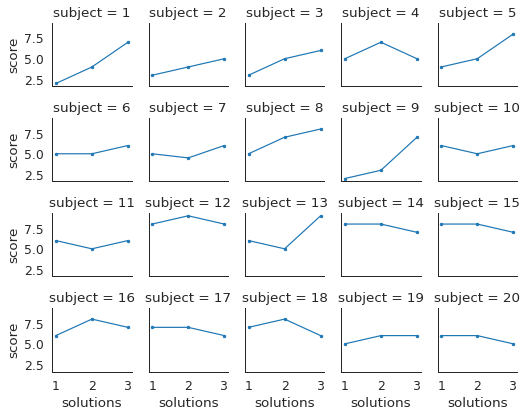

In [25]:
# tips_fg = sns.FacetGrid(tips_df, col="time", hue='smoker', height=4, aspect=1.3, col_order=['Dinner', 'Lunch'], palette="Blues")
# tips_fg.map(plt.hist, 'total_bill', bins=8)
# tips_fg.map(plt.scatter, 'total_bill', 'tip', edgecolor='red')

# kws = dict(s=50, linewidth=.5, edgecolor='w')
# tips_fg = sns.FacetGrid(tips_df, col='sex', hue='smoker', height=4, aspect=1.3, hue_kws=dict(marker=['^', 'v']))
# tips_fg.map(plt.scatter, 'total_bill', 'tip', **kws)


att_fg = sns.FacetGrid(atten, col='subject', col_wrap=5, height=1.5)
att_fg.map(plt.plot, 'solutions', 'score', marker='.')

### Regression Plot

<Figure size 576x432 with 0 Axes>

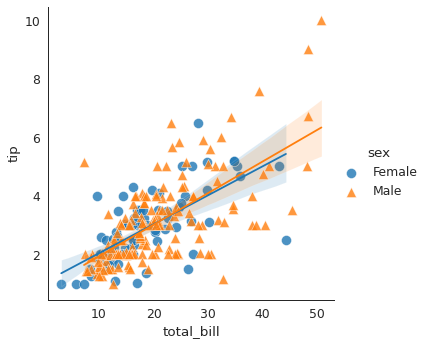

In [26]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o', '^'], scatter_kws={'s':100, 'linewidth':0.5, 'edgecolor':'w'})

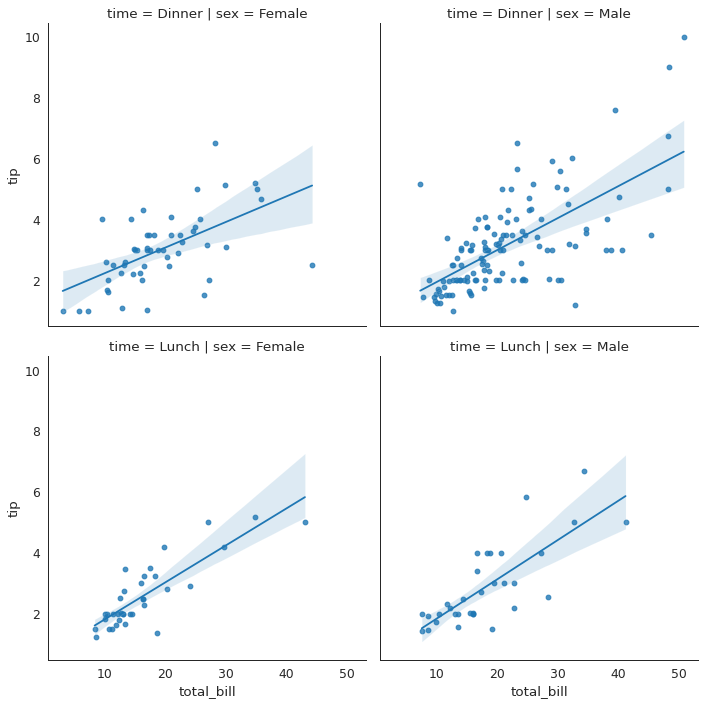

In [27]:
sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df)